In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

# for modeling 
import sklearn
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

import missingno as msno
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


We want you to set the 'RainToday' variable as the dependent variable and set up a model that predicts whether there will be rain or not. 
This model will be made using;

- 'Desicion Tree',
- 'Random Forest',
- 'LightGBM',
- 'GBM',
- 'XGBoost',
- 'CatBoost' models.

## DATA READING AND EXPLORING

In [2]:
d = pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')
df = d.copy().sample(10000)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
37355,2011-05-07,WaggaWagga,2.3,18.3,0.0,1.2,7.9,E,15.0,ESE,...,86.0,41.0,1020.4,1016.1,6.0,6.0,7.3,16.5,No,No
140119,2011-05-05,Darwin,21.7,31.2,0.0,8.2,9.8,SE,41.0,SE,...,56.0,36.0,1013.0,1009.7,7.0,5.0,24.5,30.5,No,No
18192,2009-03-19,NorahHead,17.4,26.5,0.0,NaN,NaN,NE,30.0,NNW,...,76.0,73.0,1016.6,1014.1,NaN,NaN,21.2,24.5,No,No
101087,2013-06-21,MountGambier,3.9,10.9,0.0,1.0,1.3,NE,41.0,NE,...,83.0,90.0,1015.7,1015.3,4.0,8.0,7.6,10.1,No,Yes
127422,2010-08-14,Walpole,10.2,13.9,3.2,NaN,NaN,WNW,30.0,WNW,...,73.0,61.0,1020.1,1019.9,NaN,NaN,11.1,13.4,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,2010-04-02,Bendigo,12.0,22.3,0.0,3.6,NaN,SSE,43.0,S,...,79.0,42.0,1021.1,1019.6,1.0,3.0,15.5,21.8,No,No
125979,2015-02-24,SalmonGums,16.1,38.6,0.0,NaN,NaN,NNE,39.0,NE,...,53.0,21.0,NaN,NaN,NaN,NaN,23.2,37.3,No,No
74898,2017-04-05,Nhil,9.7,26.0,0.0,NaN,NaN,ENE,31.0,E,...,45.0,24.0,1025.1,1020.5,NaN,NaN,17.1,24.1,No,No
118121,2010-05-08,PerthAirport,8.7,26.9,0.0,4.6,9.8,ENE,28.0,NE,...,31.0,25.0,1018.3,1015.5,2.0,5.0,19.2,25.2,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 37355 to 48418
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           10000 non-null  object 
 1   Location       10000 non-null  object 
 2   MinTemp        9888 non-null   float64
 3   MaxTemp        9917 non-null   float64
 4   Rainfall       9783 non-null   float64
 5   Evaporation    5699 non-null   float64
 6   Sunshine       5180 non-null   float64
 7   WindGustDir    9283 non-null   object 
 8   WindGustSpeed  9287 non-null   float64
 9   WindDir9am     9221 non-null   object 
 10  WindDir3pm     9692 non-null   object 
 11  WindSpeed9am   9883 non-null   float64
 12  WindSpeed3pm   9790 non-null   float64
 13  Humidity9am    9822 non-null   float64
 14  Humidity3pm    9695 non-null   float64
 15  Pressure9am    8996 non-null   float64
 16  Pressure3pm    8995 non-null   float64
 17  Cloud9am       6177 non-null   float64
 18  Cl

In [4]:
pd.DataFrame({"No. of unique values": list(df.nunique())}, index=df.columns)

,No. of unique values
Date,3032
Location,49
MinTemp,346
MaxTemp,417
Rainfall,270
Evaporation,169
Sunshine,141
WindGustDir,16
WindGustSpeed,57
WindDir9am,16


In [5]:
df.duplicated().sum()

0

In [6]:
y = len(df[df['RainToday'] == 'Yes'])
n = len(df[df['RainToday'] == 'No'])
print(y,n)

2182 7601


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,9888.0,12.165301,6.445339,-7.2,7.6,12.0,16.9,29.3
MaxTemp,9917.0,23.248775,7.159839,-3.7,18.0,22.6,28.3,46.7
Rainfall,9783.0,2.343739,8.429862,0.0,0.0,0.0,0.8,183.0
Evaporation,5699.0,5.468275,4.223017,0.0,2.6,4.6,7.4,56.4
Sunshine,5180.0,7.611448,3.804504,0.0,4.8,8.5,10.6,14.0
WindGustSpeed,9287.0,39.905675,13.595291,9.0,31.0,39.0,48.0,122.0
WindSpeed9am,9883.0,14.093393,8.994865,0.0,7.0,13.0,19.0,67.0
WindSpeed3pm,9790.0,18.597344,8.815649,0.0,13.0,19.0,24.0,72.0
Humidity9am,9822.0,68.941560,19.169044,2.0,57.0,70.0,83.0,100.0
Humidity3pm,9695.0,51.368437,20.934068,0.0,36.0,52.0,66.0,100.0


In [8]:
df.corr() #I can see from here which variables I can put into the model
          #For example, the variables can be removed by looking at the order of importance.

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.733502,0.101709,0.467111,0.078318,0.194449,0.187559,0.183465,-0.239648,0.003618,-0.458388,-0.469383,0.079462,0.012456,0.902432,0.706246
MaxTemp,0.733502,1.000000,-0.072376,0.601070,0.477889,0.081439,0.022513,0.055574,-0.511070,-0.517636,-0.345318,-0.442822,-0.295067,-0.295181,0.885023,0.985385
Rainfall,0.101709,-0.072376,1.000000,-0.048435,-0.222982,0.123981,0.072436,0.049111,0.225293,0.258626,-0.166667,-0.125894,0.204221,0.180899,0.009205,-0.076546
Evaporation,0.467111,0.601070,-0.048435,1.000000,0.369969,0.206339,0.205712,0.142212,-0.536256,-0.411685,-0.273935,-0.297864,-0.200548,-0.205428,0.559226,0.583780
Sunshine,0.078318,0.477889,-0.222982,0.369969,1.000000,-0.029393,-0.004009,0.044745,-0.491358,-0.633608,0.049568,-0.012828,-0.677012,-0.716187,0.298670,0.497297
WindGustSpeed,0.194449,0.081439,0.123981,0.206339,-0.029393,1.000000,0.607283,0.685242,-0.224594,-0.030121,-0.463457,-0.420950,0.062523,0.119368,0.166644,0.047157
WindSpeed9am,0.187559,0.022513,0.072436,0.205712,-0.004009,0.607283,1.000000,0.510637,-0.277995,-0.034103,-0.232168,-0.179226,0.011504,0.056397,0.138963,0.013226
WindSpeed3pm,0.183465,0.055574,0.049111,0.142212,0.044745,0.685242,0.510637,1.000000,-0.151356,0.023444,-0.306073,-0.266248,0.044823,0.047567,0.174702,0.032313
Humidity9am,-0.239648,-0.511070,0.225293,-0.536256,-0.491358,-0.224594,-0.277995,-0.151356,1.000000,0.670860,0.155078,0.205677,0.462874,0.377669,-0.475084,-0.506613
Humidity3pm,0.003618,-0.517636,0.258626,-0.411685,-0.633608,-0.030121,-0.034103,0.023444,0.670860,1.000000,-0.016658,0.065282,0.534927,0.537230,-0.226140,-0.565165


## SOME OF VISUALIZATION

<AxesSubplot:>

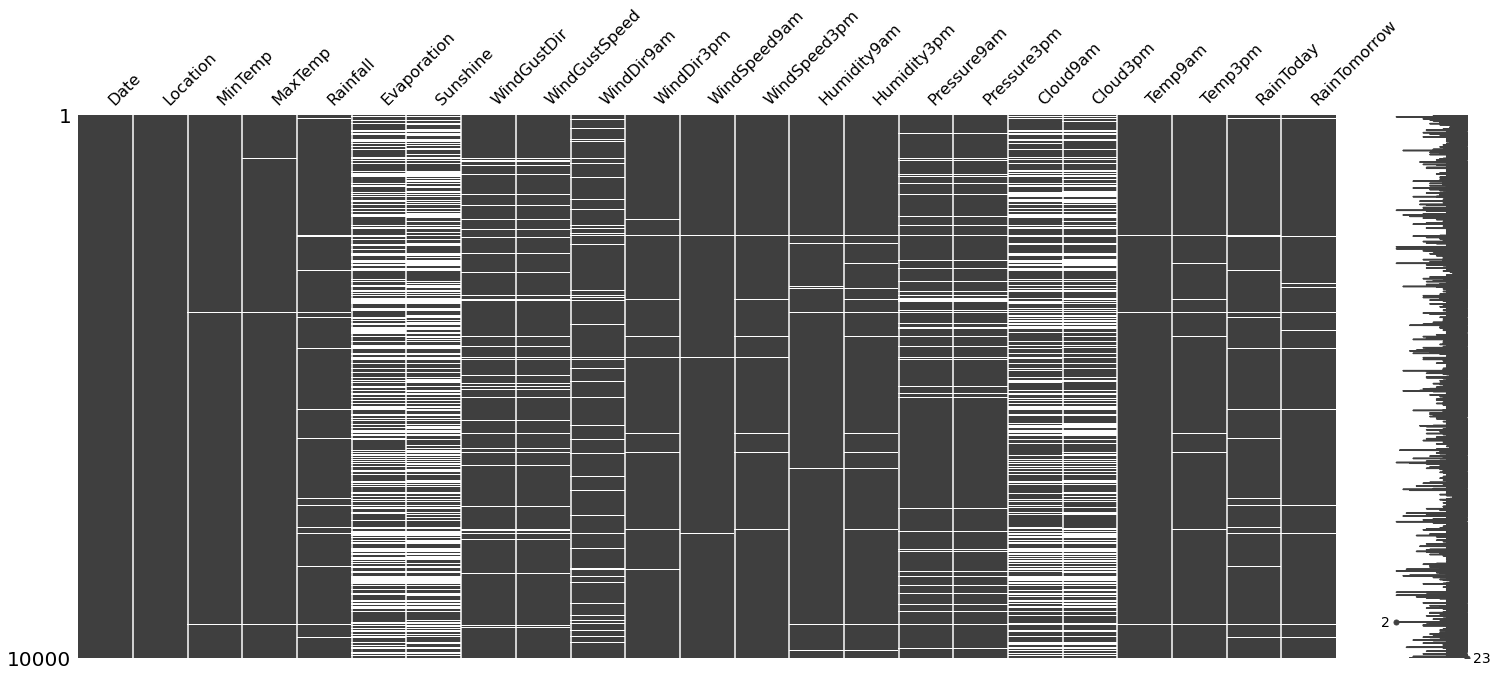

In [9]:
#VISUALIZATION OF NAN  VALUES
msno.matrix(df)

In [10]:
#drop missing values in the RainToday and RainTomorrow
df.dropna(subset=['RainToday', 'RainTomorrow'],axis=0,inplace=True)

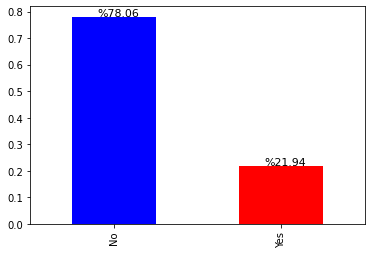

In [11]:
ax = df['RainTomorrow'].value_counts(normalize=True).plot.bar(color=["blue", "red"])
def labels(ax):
    for p in ax.patches:
        ax.annotate(f"%{p.get_height()*100:.2f}", (p.get_x() + 0.15, p.get_height() * 1.005),size=11)
labels(ax)

In [12]:
def summary(df):
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0]) # .shape[0] yazilmaz ise unique olan degerlerin listelerini getirir.
    Nulls = df.apply(lambda x: x.isnull().sum())

    cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
    str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    display(str.sort_values(by='Nulls', ascending=False))
    print('__________Data Types__________\n')
    print(str.Types.value_counts())
summary(df)

,Types,Counts,Uniques,Nulls,Min,Max
Sunshine,float64,5077,142,4604,0.0,14.0
Evaporation,float64,5594,169,4087,0.0,56.4
Cloud3pm,float64,5757,10,3924,0.0,8.0
Cloud9am,float64,6074,10,3607,0.0,8.0
Pressure3pm,float64,8748,421,933,985.8,1037.6
Pressure9am,float64,8755,429,926,986.7,1040.3
WindDir9am,object,8950,17,731,NaN,NaN
WindGustDir,object,9049,17,632,NaN,NaN
WindGustSpeed,float64,9053,57,628,9.0,115.0
WindDir3pm,object,9409,17,272,NaN,NaN


__________Data Types__________

float64    16
object      7
Name: Types, dtype: int64


In [13]:
#label encoding for univariate variables
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()
df["RainToday_label"] = lbe.fit_transform(df["RainToday"])
df["RainTomorrow_label"] = lbe.fit_transform(df["RainTomorrow"])

In [14]:
# one-hot encoding for variables with more than 2 categories

#drop variables with so many countries for the sake of time and memory consumption
df.drop(['Date','Location','WindDir9am','WindDir3pm','WindGustDir'], axis=1, inplace=True) 

In [15]:
summary(df)

,Types,Counts,Uniques,Nulls,Min,Max
Sunshine,float64,5077,142,4604,0.0,14.0
Evaporation,float64,5594,169,4087,0.0,56.4
Cloud3pm,float64,5757,10,3924,0.0,8.0
Cloud9am,float64,6074,10,3607,0.0,8.0
Pressure3pm,float64,8748,421,933,985.8,1037.6
Pressure9am,float64,8755,429,926,986.7,1040.3
WindGustSpeed,float64,9053,57,628,9.0,115.0
Humidity3pm,float64,9439,101,242,0.0,100.0
Temp3pm,float64,9501,408,180,-4.1,46.1
WindSpeed3pm,float64,9503,34,178,0.0,72.0


__________Data Types__________

float64    16
object      2
int64       2
Name: Types, dtype: int64


In [16]:
# DecisionTreeRegressor

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

#drop unnecessary columns and date columns
df_imputation = df.drop(['RainToday','RainTomorrow'], axis=1) 

#define variables to keep the index and the columns
index = df_imputation.index
columns = df_imputation.columns

#imputation steps
imp_tree = IterativeImputer(random_state=0, estimator=DecisionTreeRegressor())
imp_tree.fit(df_imputation)
df_imputed = imp_tree.transform(df_imputation)

#transform imputed data in array format to dataframe
df_imputed_tree = pd.DataFrame(df_imputed, index=index, columns=columns)

df_imputed_tree.isnull().sum()

MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustSpeed         0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm           0
Cloud9am              0
Cloud3pm              0
Temp9am               0
Temp3pm               0
RainToday_label       0
RainTomorrow_label    0
dtype: int64

In [17]:
df_imputed_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 37355 to 48418
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MinTemp             9681 non-null   float64
 1   MaxTemp             9681 non-null   float64
 2   Rainfall            9681 non-null   float64
 3   Evaporation         9681 non-null   float64
 4   Sunshine            9681 non-null   float64
 5   WindGustSpeed       9681 non-null   float64
 6   WindSpeed9am        9681 non-null   float64
 7   WindSpeed3pm        9681 non-null   float64
 8   Humidity9am         9681 non-null   float64
 9   Humidity3pm         9681 non-null   float64
 10  Pressure9am         9681 non-null   float64
 11  Pressure3pm         9681 non-null   float64
 12  Cloud9am            9681 non-null   float64
 13  Cloud3pm            9681 non-null   float64
 14  Temp9am             9681 non-null   float64
 15  Temp3pm             9681 non-null   float64
 16  R

## 1-Decision Tree Classifier

In [18]:
df2 = df_imputed_tree.copy()
x_dat = df2.drop(['RainTomorrow_label'],axis=1)
y = df2["RainTomorrow_label"].values

In [19]:
X=(x_dat-np.min(x_dat))/(np.max(x_dat)-np.min(x_dat)).values

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [21]:
dtc = DecisionTreeClassifier()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

cart_model = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)
y_pred = cart_model.predict(X_test)
y_pred

array([0., 0., 1., ..., 0., 1., 1.])

In [23]:
dtc_score=accuracy_score(y_test,y_pred)
dtc_score

0.7841652323580034

In [24]:
c_dtc=confusion_matrix(y_test,y_pred)
c_dtc

array([[1938,  307],
       [ 320,  340]])

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      2245
         1.0       0.53      0.52      0.52       660

    accuracy                           0.78      2905
   macro avg       0.69      0.69      0.69      2905
weighted avg       0.78      0.78      0.78      2905



## Decision Tree Model tuning

In [26]:
tree_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [27]:
tree1 = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree1, tree_grid, cv = 10, n_jobs = -1, verbose = 2)
tree_cv_model = tree_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1772 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 3718 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 4284 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   52.3s finished


In [28]:
print("Best Parameters: " + str(tree_cv_model.best_params_))

Best Parameters: {'max_depth': 5, 'min_samples_split': 21}


In [29]:
tree1 = DecisionTreeClassifier(max_depth = 5, min_samples_split = 23)
tree_tuned1 = tree1.fit(X_train, y_train)

In [30]:
y_pred = tree_tuned1.predict(X_test)
dtc_finalscore=accuracy_score(y_test, y_pred)
dtc_finalscore

0.8388984509466437

In [31]:
c_dtc2=confusion_matrix(y_test,y_pred)
c_dtc2

array([[2116,  129],
       [ 339,  321]])

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      2245
         1.0       0.71      0.49      0.58       660

    accuracy                           0.84      2905
   macro avg       0.79      0.71      0.74      2905
weighted avg       0.83      0.84      0.83      2905



## 2-Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
y_pred = rf_model.predict(X_test)

In [36]:
rf_score=accuracy_score(y_test,y_pred)
rf_score

0.8450946643717728

In [37]:
c_rf=confusion_matrix(y_test,y_pred)
c_rf

array([[2133,  112],
       [ 338,  322]])

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      2245
         1.0       0.74      0.49      0.59       660

    accuracy                           0.85      2905
   macro avg       0.80      0.72      0.75      2905
weighted avg       0.84      0.85      0.83      2905



In [39]:
rf_model.predict(X_test)[0:10] # ilk 10 datatestdeki tahminler.

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [40]:
rf_model.predict_proba(X_test)[0:10] #1.si 0 olma 2.si 1 olma olasiligi oranlari.

array([[0.66, 0.34],
       [1.  , 0.  ],
       [0.56, 0.44],
       [0.46, 0.54],
       [0.85, 0.15],
       [0.95, 0.05],
       [0.86, 0.14],
       [0.93, 0.07],
       [0.85, 0.15],
       [0.94, 0.06]])

n_estimators= 1 --> Accuracy: 77.31497418244406 %
n_estimators= 2 --> Accuracy: 81.10154905335628 %
n_estimators= 3 --> Accuracy: 81.48020654044751 %
n_estimators= 4 --> Accuracy: 82.5473321858864 %
n_estimators= 5 --> Accuracy: 82.51290877796902 %
n_estimators= 6 --> Accuracy: 83.23580034423408 %
n_estimators= 7 --> Accuracy: 83.407917383821 %
n_estimators= 8 --> Accuracy: 83.88984509466437 %
n_estimators= 9 --> Accuracy: 84.06196213425129 %
n_estimators= 10 --> Accuracy: 83.78657487091222 %
n_estimators= 11 --> Accuracy: 83.95869191049914 %
n_estimators= 12 --> Accuracy: 84.13080895008605 %
n_estimators= 13 --> Accuracy: 84.40619621342513 %
n_estimators= 14 --> Accuracy: 84.33734939759037 %
n_estimators= 15 --> Accuracy: 84.30292598967297 %
n_estimators= 16 --> Accuracy: 84.4750430292599 %
n_estimators= 17 --> Accuracy: 84.54388984509467 %
n_estimators= 18 --> Accuracy: 84.26850258175558 %
n_estimators= 19 --> Accuracy: 84.44061962134252 %
n_estimators= 20 --> Accuracy: 84.2685025817

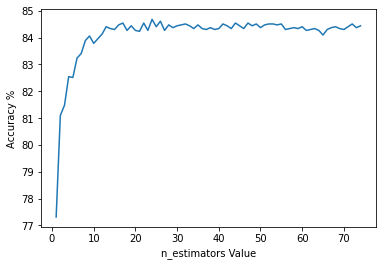

In [41]:
from sklearn.ensemble import RandomForestClassifier 
score_list=[]
for each in range(1,75):
    rf2=RandomForestClassifier(n_estimators=each, random_state=42)
    rf2.fit(X_train, y_train)
    score_list.append(100*rf2.score(X_test, y_test))
    print("n_estimators=", each, "--> Accuracy:", 100*rf2.score(X_test, y_test), "%")

plt.plot([*range(1,75)], score_list)
plt.xlabel("n_estimators Value")
plt.ylabel("Accuracy %")
plt.show()

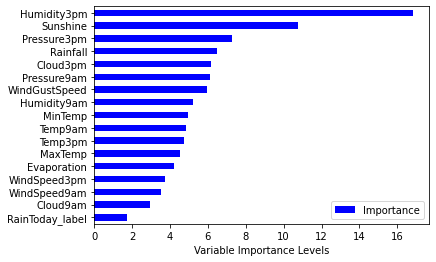

In [42]:
Importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "b")

plt.xlabel("Variable Importance Levels");

In [43]:
y_pred = rf2.predict(X_test)
rf_finalscore=accuracy_score(y_test, y_pred)
rf_finalscore

0.8444061962134252

## 3-LightGBM

In [44]:
from lightgbm import LGBMClassifier

In [45]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [46]:
y_pred = lgbm_model.predict(X_test)

In [47]:
accuracy_score(y_test, y_pred)

0.8430292598967297

## Model Tuning of LightGBM

In [48]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [49]:
lgbm = LGBMClassifier(learning_rate = 0.1, 
                       max_depth = 4,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 10)
lgbm_tuned = lgbm.fit(X_train,y_train)

In [50]:
y_pred = lgbm_tuned.predict(X_test)
lgbm_finalscore=accuracy_score(y_test, y_pred)
lgbm_finalscore

0.8437177280550775

In [51]:
c_lgbm=confusion_matrix(y_test,y_pred)
c_lgbm

array([[2105,  140],
       [ 314,  346]])

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      2245
         1.0       0.71      0.52      0.60       660

    accuracy                           0.84      2905
   macro avg       0.79      0.73      0.75      2905
weighted avg       0.83      0.84      0.83      2905



## 4-Gradient Boosting Classifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [55]:
y_pred = gbm_model.predict(X_test)

In [56]:
accuracy_score(y_test, y_pred)

0.8475043029259897

## Model Tuning of GBM

In [57]:
gbm = GradientBoostingClassifier(learning_rate = 0.05, 
                                 max_depth = 10,
                                min_samples_split = 10,
                                n_estimators = 100)

In [58]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [59]:
y_pred = gbm_tuned.predict(X_test)
gbm_finalscore=accuracy_score(y_test,y_pred)
gbm_finalscore

0.8364888123924269

In [60]:
c_gbm=confusion_matrix(y_test,y_pred)
c_gbm

array([[2104,  141],
       [ 334,  326]])

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      2245
         1.0       0.70      0.49      0.58       660

    accuracy                           0.84      2905
   macro avg       0.78      0.72      0.74      2905
weighted avg       0.83      0.84      0.83      2905



## 5-XGBOOST

In [79]:
!pip install xgboost

In [63]:
from xgboost import XGBClassifier

In [64]:
xgb_model = XGBClassifier().fit(X_train, y_train)

[17:04:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [65]:
y_pred = xgb_model.predict(X_test)

In [66]:
accuracy_score(y_test, y_pred)

0.8395869191049914

## Model Tuning of XGBoost

In [67]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 6,
                    n_estimators = 100,
                    subsample = 0.8)
xgb_tuned =  xgb.fit(X_train,y_train)
y_pred = xgb_tuned.predict(X_test)
XGBoost_finalscore=accuracy_score(y_test, y_pred)
XGBoost_finalscore

[17:04:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8454388984509467

In [68]:
c_xgb=confusion_matrix(y_test,y_pred)
c_xgb

array([[2135,  110],
       [ 339,  321]])

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      2245
         1.0       0.74      0.49      0.59       660

    accuracy                           0.85      2905
   macro avg       0.80      0.72      0.75      2905
weighted avg       0.84      0.85      0.83      2905



## 6-Catboost

In [70]:
!pip install catboost

In [71]:
from catboost import CatBoostClassifier, Pool

In [72]:
cat = CatBoostClassifier()

In [73]:
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)

Learning rate set to 0.023322
0:	learn: 0.6743229	total: 58.7ms	remaining: 58.6s
1:	learn: 0.6572013	total: 63.2ms	remaining: 31.5s
2:	learn: 0.6400901	total: 67.4ms	remaining: 22.4s
3:	learn: 0.6251049	total: 71.7ms	remaining: 17.8s
4:	learn: 0.6101942	total: 76ms	remaining: 15.1s
5:	learn: 0.5963859	total: 80.5ms	remaining: 13.3s
6:	learn: 0.5849460	total: 84.8ms	remaining: 12s
7:	learn: 0.5742701	total: 89.1ms	remaining: 11.1s
8:	learn: 0.5617907	total: 93.7ms	remaining: 10.3s
9:	learn: 0.5498022	total: 98.1ms	remaining: 9.71s
10:	learn: 0.5392250	total: 102ms	remaining: 9.2s
11:	learn: 0.5287120	total: 107ms	remaining: 8.79s
12:	learn: 0.5199083	total: 111ms	remaining: 8.43s
13:	learn: 0.5116891	total: 115ms	remaining: 8.13s
14:	learn: 0.5033173	total: 120ms	remaining: 7.88s
15:	learn: 0.4952876	total: 124ms	remaining: 7.62s
16:	learn: 0.4875415	total: 128ms	remaining: 7.42s
17:	learn: 0.4803380	total: 133ms	remaining: 7.24s
18:	learn: 0.4733858	total: 137ms	remaining: 7.08s
19:	le

In [74]:
cat_finalscore = accuracy_score(y_test, y_pred)
cat_finalscore

0.8475043029259897

In [75]:
c_cat=confusion_matrix(y_test,y_pred)
c_cat

array([[2119,  126],
       [ 317,  343]])

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91      2245
         1.0       0.73      0.52      0.61       660

    accuracy                           0.85      2905
   macro avg       0.80      0.73      0.76      2905
weighted avg       0.84      0.85      0.84      2905



In [77]:
print(dtc_finalscore,rf_finalscore,lgbm_finalscore, gbm_finalscore, XGBoost_finalscore, cat_finalscore)

0.8388984509466437 0.8444061962134252 0.8437177280550775 0.8364888123924269 0.8454388984509467 0.8475043029259897


### ----> Best Model is CatBOOST <----

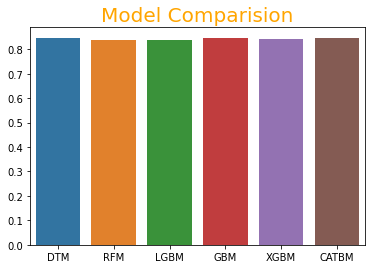

In [78]:
idx = ["DTM","RFM","LGBM", "GBM", "XGBM", "CATBM"]
regressions = [rf_finalscore,dtc_finalscore, gbm_finalscore, XGBoost_finalscore, lgbm_finalscore,cat_finalscore,]

plt.figure(figsize=(6,4))
sns.barplot(x=idx,y=regressions)
plt.xticks()
plt.title('Model Comparision',color = 'orange',fontsize=20);